In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
#nltk.download('all')
nltk.download('punkt') 
nltk.download('punkt_tab')     
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("../data/raw/dataset.csv")

df.head()


,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,General Inquiry,low,de,Crash,Technical,Bug,Hardware,Resolution,Outage,Documentation,NaN
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN
3,Krankenhaus-Dienstleistung-Problem,Ein Medien-Daten-Sperrverhalten trat aufgrund ...,Zurück zur E-Mail-Beschwerde über den Sperrver...,Incident,Customer Service,high,de,Security,Breach,Login,Maintenance,Incident,Resolution,Feedback,NaN
4,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,Documentation,Guidance,NaN,NaN


In [3]:
df.isnull().sum()



subject      1461
body            2
answer          4
type            0
queue           0
priority        0
language        0
tag_1           0
tag_2          46
tag_3          95
tag_4        1539
tag_5        6909
tag_6       12649
tag_7       16072
tag_8       18093
dtype: int64

In [4]:
df['answer'] = df['answer'].fillna('')
tag_cols = ['tag_1','tag_2','tag_3','tag_4','tag_5','tag_6','tag_7','tag_8']

df[tag_cols] = df[tag_cols].fillna('None')
df["subject"]=df["subject"].fillna('')
df["body"]=df["body"].fillna('')

In [5]:

df["text"] = df["subject"] + " " + df["body"]
df[["subject", "body", "text"]].head()


,subject,body,text
0,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Unvorhergesehener Absturz der Datenanalyse-Pla...
1,Customer Support Inquiry,Seeking information on digital strategies that...,Customer Support Inquiry Seeking information o...
2,Data Analytics for Investment,I am contacting you to request information on ...,Data Analytics for Investment I am contacting ...
3,Krankenhaus-Dienstleistung-Problem,Ein Medien-Daten-Sperrverhalten trat aufgrund ...,Krankenhaus-Dienstleistung-Problem Ein Medien-...
4,Security,"Dear Customer Support, I am reaching out to in...","Security Dear Customer Support, I am reaching ..."


In [6]:
df.isnull().sum()


subject     0
body        0
answer      0
type        0
queue       0
priority    0
language    0
tag_1       0
tag_2       0
tag_3       0
tag_4       0
tag_5       0
tag_6       0
tag_7       0
tag_8       0
text        0
dtype: int64

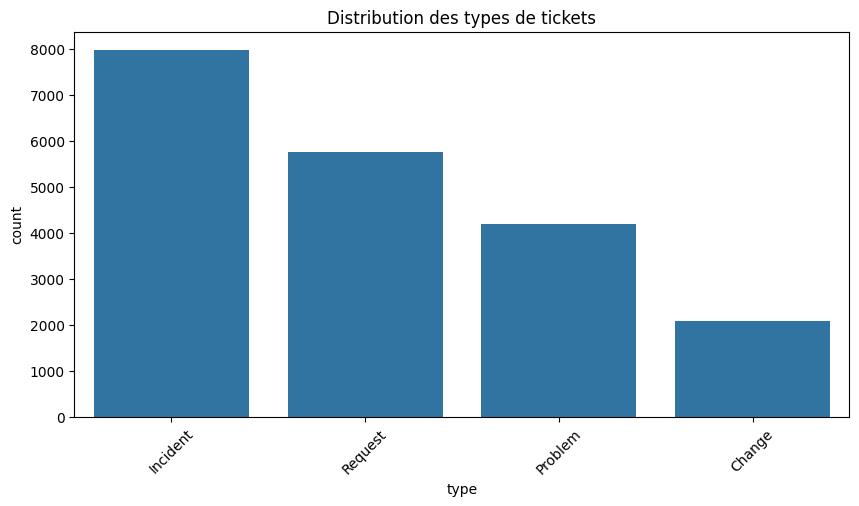

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="type")
plt.title("Distribution des types de tickets")
plt.xticks(rotation=45)
plt.show()


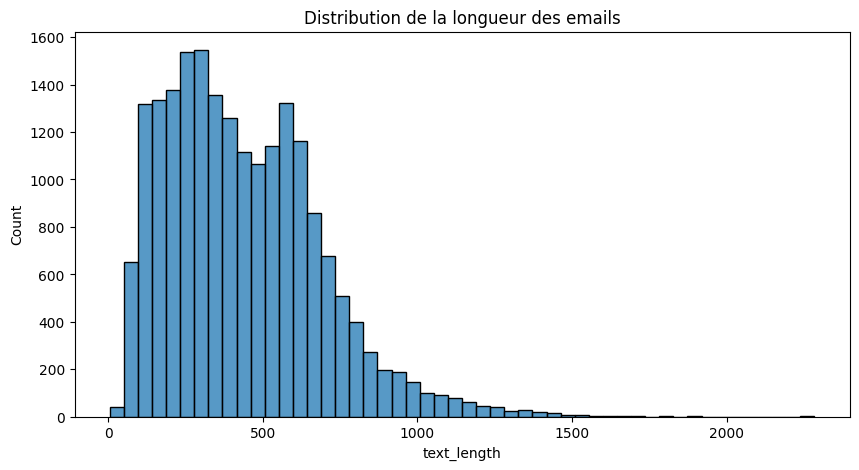

In [8]:
df["text_length"] = df["text"].apply(len)

plt.figure(figsize=(10,5))
sns.histplot(df["text_length"], bins=50)
plt.title("Distribution de la longueur des emails")
plt.show()


In [9]:
stop_words = set(stopwords.words('english')) | set(stopwords.words('german'))
def clean_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text) #supprime tout ce qui n’est pas une lettre ou un espace
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalnum()]  
    return " ".join(filtered_tokens)

df["clean_text"] = df["text"].apply(clean_text)

print(df[["text", "clean_text"]].head())


                                                text  \
0  Unvorhergesehener Absturz der Datenanalyse-Pla...   
1  Customer Support Inquiry Seeking information o...   
2  Data Analytics for Investment I am contacting ...   
3  Krankenhaus-Dienstleistung-Problem Ein Medien-...   
4  Security Dear Customer Support, I am reaching ...   

                                          clean_text  
0  unvorhergesehener absturz datenanalyseplattfor...  
1  customer support inquiry seeking information d...  
2  data analytics investment contacting request i...  
3  krankenhausdienstleistungproblem mediendatensp...  
4  security dear customer support reaching inquir...  


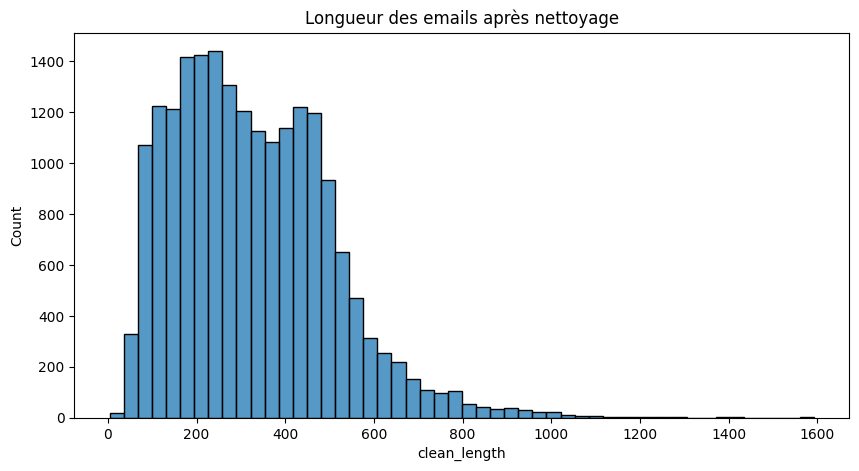

In [10]:
df["clean_length"] = df["clean_text"].apply(len)

plt.figure(figsize=(10,5))
sns.histplot(df["clean_length"], bins=50)
plt.title("Longueur des emails après nettoyage")
plt.show()


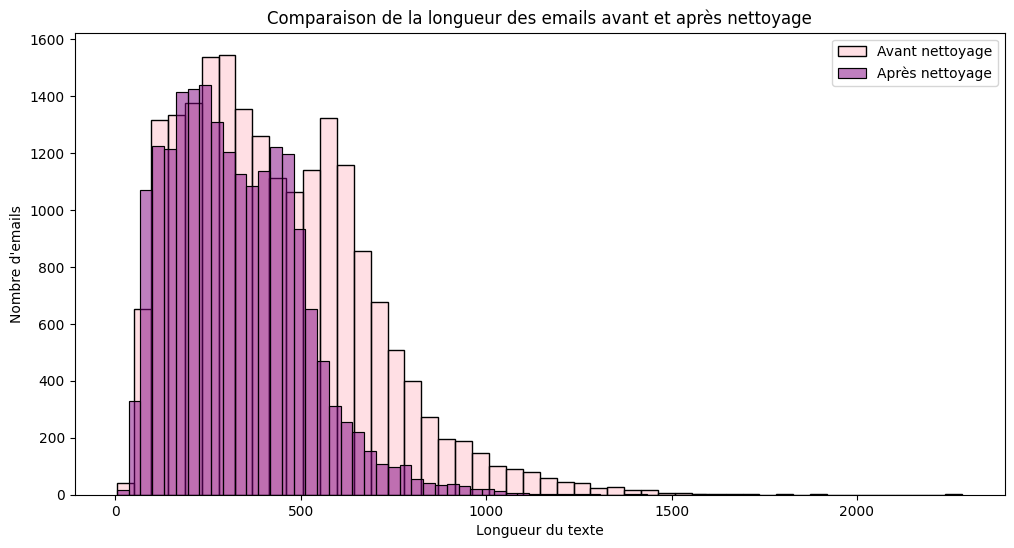

In [11]:
plt.figure(figsize=(12,6))

# Histogramme avant nettoyage
sns.histplot(df["text_length"], bins=50, color="pink", label="Avant nettoyage", alpha=0.5)

# Histogramme après nettoyage
sns.histplot(df["clean_length"], bins=50, color="purple", label="Après nettoyage", alpha=0.5)

plt.title("Comparaison de la longueur des emails avant et après nettoyage")
plt.xlabel("Longueur du texte")
plt.ylabel("Nombre d'emails")
plt.legend()
plt.show()


In [12]:



df.head()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,text,text_length,clean_text,clean_length
0,Unvorhergesehener Absturz der Datenanalyse-Pla...,Die Datenanalyse-Plattform brach unerwartet ab...,Ich werde Ihnen bei der Lösung des Problems he...,Incident,General Inquiry,low,de,Crash,Technical,Bug,Hardware,Resolution,Outage,Documentation,None,Unvorhergesehener Absturz der Datenanalyse-Pla...,305,unvorhergesehener absturz datenanalyseplattfor...,205
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,None,None,None,None,Customer Support Inquiry Seeking information o...,250,customer support inquiry seeking information d...,183
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,None,None,Data Analytics for Investment I am contacting ...,726,data analytics investment contacting request i...,545
3,Krankenhaus-Dienstleistung-Problem,Ein Medien-Daten-Sperrverhalten trat aufgrund ...,Zurück zur E-Mail-Beschwerde über den Sperrver...,Incident,Customer Service,high,de,Security,Breach,Login,Maintenance,Incident,Resolution,Feedback,None,Krankenhaus-Dienstleistung-Problem Ein Medien-...,256,krankenhausdienstleistungproblem mediendatensp...,204
4,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,Documentation,Guidance,None,None,"Security Dear Customer Support, I am reaching ...",684,security dear customer support reaching inquir...,469


In [13]:
df.to_csv("../data/processed/tickets_clean.csv", index=False)
